## **❤ רגרסיה לוגיסטית של חיזוי מחלת לב ❤**


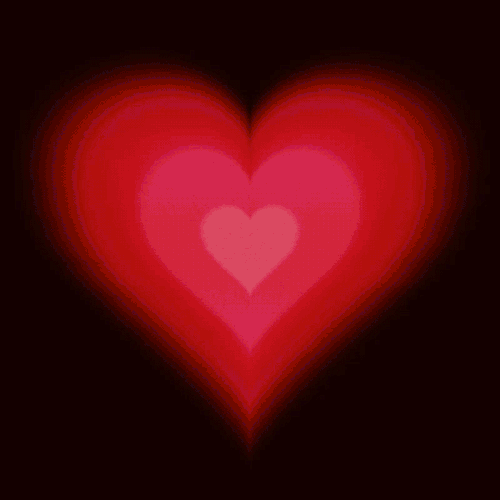

**מייבאים ספריות**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

**מורידים את מערך הנתונים**

In [ ]:
!unzip archive(1) 2.zip

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip archive(1) 2.zip'


In [ ]:

from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv('archive(1) 2.zip')

Saving archive(1) 2.zip to archive(1) 2.zip


**נראה את מערך הנתונים**

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


**נדפיס את חמשת השורות הראשונות של מערך הנתונים**

In [ ]:
print(df.head())
print(df.shape)

   male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]
(4238, 16)


**נבדוק את סוג המשתנה של כל עמודה**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


**נבדוק נתונים סטיסטיים של מערך הנתונים**

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**נבדוק כמה אנשים במערך נתונים חולים ולא חולים**

In [ ]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

**נדפיס טבלה שתציג את הקורלציה בין כל קטגוריה לבין מחלת לב (Heatmap)**

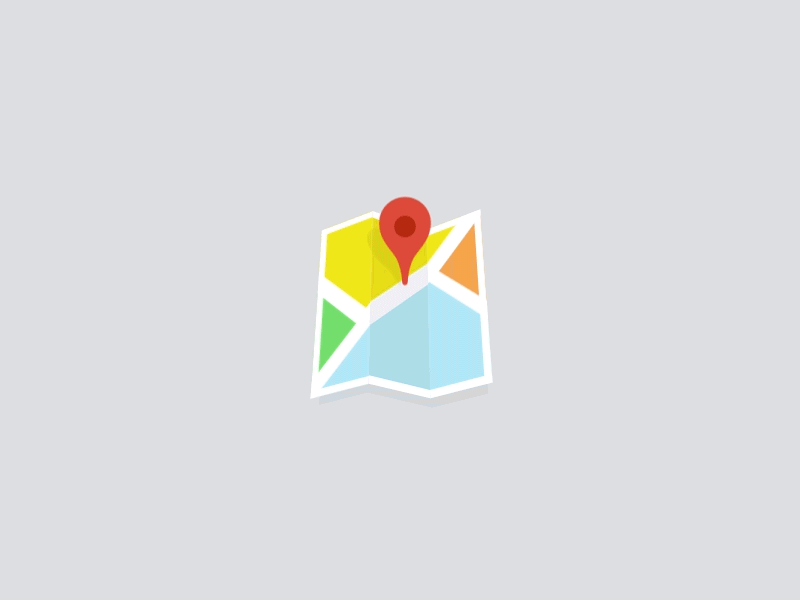

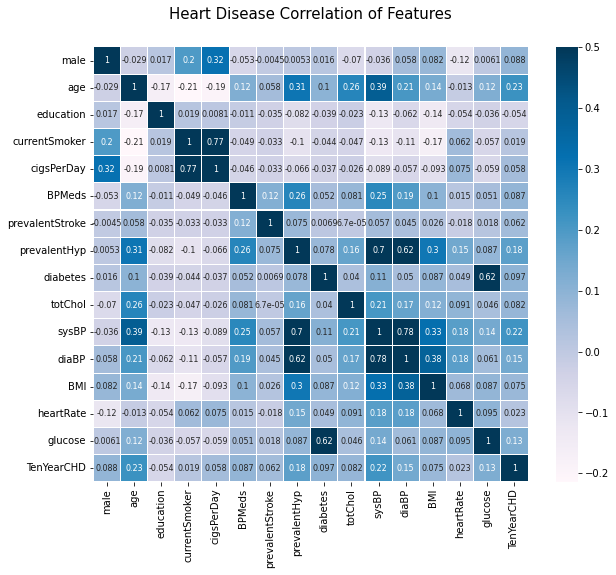

In [ ]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Heart Disease Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 0.5, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

**נוריד את העמודה שמציגה האם מישהוא חלה במחלת לב או לא ונכין מהעמודה מערך נתונים חדש**

In [ ]:
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

**נחלק את מערך הנתונים למערך אימון ומערך בדיקה**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((3390, 15), (848, 15))

**נבדוק כמה מהערכים היינם רייקים במערך הנתונים**

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_train[numerical].isnull().sum()

male                 0
age                  0
education           85
currentSmoker        0
cigsPerDay          27
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 17
heartRate            1
glucose            308
dtype: int64

**נוריד את הערכים הרייקים ממערך הנתונים**

In [ ]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)   

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**נערוך בדיקה נוספת בכדי לבדוק אם עדיין יש ערכים רייקים במערך הנתונים**

In [ ]:
X_train[numerical].isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

****

**נבדוק כמה פיצ'רים יש במערך האימון**

In [ ]:
n_features = X_train.shape[1]
n_features

15

**בניית המודל ובחירת פונקציות אקטיבציאה**

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

**בחירת אופטימייזר ולוס פנקשן**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**אימון המודל**

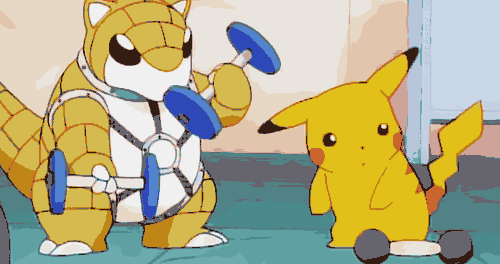

In [ ]:
model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=0)

**בדיקת דיוק המודל**

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
acc

0.849892795085907

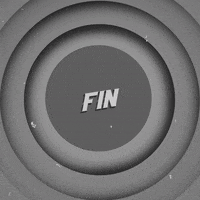